In [1]:
import ROOT as r
import math
import array
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages

from scipy.optimize import minimize
from scipy.signal import find_peaks

import numpy as np
from scipy.optimize import curve_fit

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import DBPARSE
from UTILITIES import *
from SIMFITS2D import DistributionFits2D
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend


Welcome to JupyROOT 6.26/06


In [2]:
kin2theta=59.34
kin2phi=1.84

kin3theta=70.94
kin3phi=.51

kin4theta=74.07
kin4phi=.55

In [3]:
from ROOT import TVector3
import numpy as np

def spherical_to_cartesian(theta_deg, phi_deg):
    """
    Convert spherical coordinates (theta, phi in degrees) to a ROOT TVector3.
    - theta: angle from z-axis (polar angle)
    - phi: angle in x-y plane from x-axis (azimuthal angle)
    """
    theta = np.radians(theta_deg)
    phi = np.radians(phi_deg)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    return TVector3(x, y, z)


In [4]:
kin2_xyz = spherical_to_cartesian(kin2theta, kin2phi)
kin3_xyz = spherical_to_cartesian(kin3theta, kin3phi)
kin4_xyz = spherical_to_cartesian(kin4theta, kin4phi)

print("Kin2:", kin2_xyz)
print("Kin3:", kin3_xyz)
print("Kin4:", kin4_xyz)


Kin2: Name: TVector3 Title: A 3D physics vector
Kin3: Name: TVector3 Title: A 3D physics vector
Kin4: Name: TVector3 Title: A 3D physics vector


In [5]:
pas="1"
config="3"

W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
#dymin=-.984
#dymax=.9
#W2max=1.75
#dybgmin=-1.2
#dybgmax=1.2
#dxmin=-2
#dxmax=1
print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: -0.5
W2max: 1.7
dxmin: -0.4
dxmax: 0.4
dymin: -0.5
dymax: 0.5
dybgmin: -1.3
dybgmax: 1.2
Coin Min: 88 Coin Max: 100


In [6]:
import ROOT as r


def list_branches(rootfile_path, tree_name="Tout"):
    # Open the ROOT file
    root_file = r.TFile.Open(rootfile_path)
    
    # Check if the file was successfully opened
    if not root_file or root_file.IsZombie():
        print(f"Error: Could not open ROOT file '{rootfile_path}'.")
        return
    
    # Access the TTree
    tree = root_file.Get(tree_name)
    
    # Check if the tree exists
    if not tree:
        print(f"Error: Tree '{tree_name}' not found in file '{rootfile_path}'.")
        root_file.Close()
        return
    
    # Get the list of branches
    branch_list = tree.GetListOfBranches()
    
    # Print all branch names
    print(f"Branches in tree '{tree_name}':")
    for branch in branch_list:
        print(branch.GetName())
    
    # Close the ROOT file
    root_file.Close()

# Example usage
rootfile_path = "../outfiles/HCal_data_GEN3_sbs100p_nucleon_np_model1.root"
list_branches(rootfile_path)


Branches in tree 'Tout':
runnum
WCut
pCut
nCut
fiduCut
coinCut
ebeam
nu
Q2
W2
dpel
ephi
etheta
pcentral
vz
vx
vy
xtgt
ytgt
thtgt
phtgt
thetabend
xfp
yfp
thfp
phfp
trP
trPx
trPy
trPz
ePS
xPS
eSH
xSH
ySH
eHCAL
xHCAL
yHCAL
xHCAL_exp
yHCAL_exp
dx
dy
ngrinch_hits
xGRINCH
yGRINCH
coin_time
hcal_time
bbcal_time
BPMAx
BPMAy
Rasterx
Rastery
Raster2x
Raster2y
helicity
IHWP
pblkid
tdc
atime
nblk
mag
run
tar
cblkid
cblkatime
cblktime
cblke
nclus
cid
cx
cy
catime
hodoTimes
hodoIDs
hodoTOT
nbars
meanTOT
trigger
triggerID
NdataTriggerID
hodoClusMean


Error in <TList::Clear>: A list is accessing an object (0x3a3140a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x34fde230) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x34fde660) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x3a35d6b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x3a35da20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x3a37ee10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x3a37f280) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x3a37f640) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x3a37ffa0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x3a3803

In [10]:
generic=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpyData/GEN{config}/HCal_data/generic1.npz")


In [11]:
print(generic.files)


['nu', 'Q2', 'W2', 'vz', 'vx', 'vy', 'dx', 'dy', 'eSH', 'ePS', 'etheta', 'trP', 'thtgt', 'phtgt', 'coin_time', 'trPx', 'trPy', 'trPz', 'ephi', 'ebeam']


In [12]:
ebeam=generic['ebeam']
trPx=generic['trPx']
trPy=generic['trPy']
trPz=generic['trPz']
nu=generic['nu']
Q2old=generic['Q2']
etheta=generic['etheta']
trP=generic['trP']

In [17]:
import pandas as pd

# Create the DataFrame from your arrays
df = pd.DataFrame({
    'Ebeam': generic['ebeam'],
    'theta_e': generic['etheta'],
    'p_e': generic['trP']
})

# Save to CSV with the custom header row at the top
with open("overview.csv", "w") as f:
    f.write("Ebeam,theta_e,p_e\n")  # custom header
    df.to_csv(f, index=False, header=False)  # write data without pandas' default header


Text(0.5, 0, 'rad')

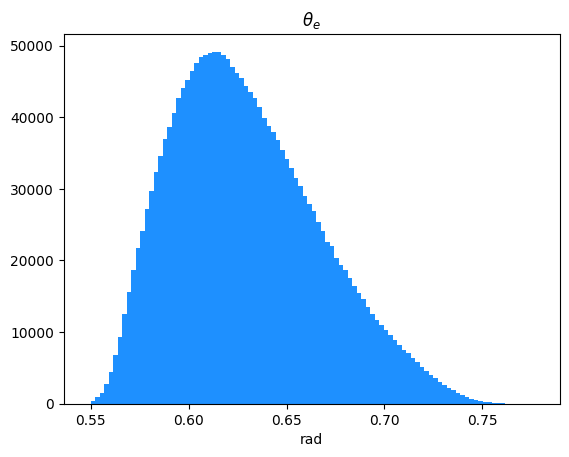

In [23]:
d=plt.hist(etheta,bins=100,color='dodgerblue')
plt.title(r'$\theta_e$')
plt.xlabel("rad")

Text(0.5, 0, 'GeV')

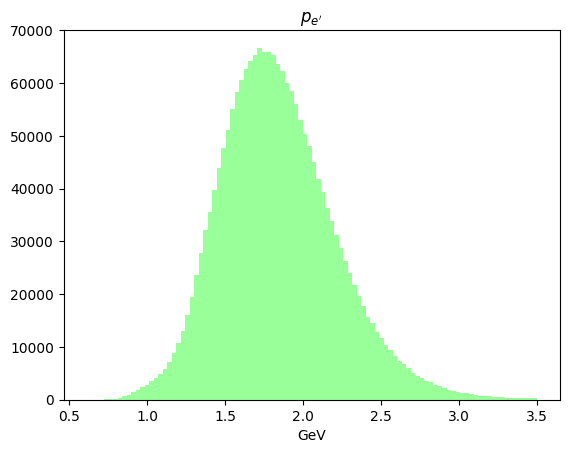

In [35]:
d=plt.hist(trP,bins=100,color='lime',alpha=.4)
plt.title(r"$p_{e'}$")
plt.xlabel("GeV")

In [138]:
from ROOT import TLorentzVector
Q2recon=[]
nuNew=[]
pNhat=[]
Px=[]
Pz=[]
thStar=[]
phStar=[]
for i in range(0,len(trPx)):
#for i in range(0,30):
    
    Pe = TLorentzVector(0, 0, E_beam, E_beam)
    Peprime = TLorentzVector(trPx[i], trPy[i], trPz[i], trP[i])
    q=TLorentzVector(Pe-Peprime)
    n=Pe.Vect().Unit().Cross(Peprime.Vect().Unit()).Unit()
    
    Px.append(n.Dot(q.Vect().Unit().Cross(kin3_xyz)))
    Pz.append(q.Vect().Unit().Dot(kin3_xyz))
    thStar.append()
    phStar.append()
    nuNew.append(q.E())
    pNhat.append(q.Vect().Unit())
    Q2recon.append(-q.M2())


In [162]:
from ROOT import TLorentzVector
import numpy as np

Q2recon = []
nuNew = []
pNhat = []
Px = []
Pz = []
thStar = []
phStar = []

for i in range(len(trPx)):
    Pe = TLorentzVector(0, 0, E_beam, E_beam)
    Peprime = TLorentzVector(trPx[i], trPy[i], trPz[i], trP[i])
    q = TLorentzVector(Pe - Peprime)
    
    q_hat = q.Vect().Unit()
    pe_hat = Pe.Vect().Unit()
    pep_hat = Peprime.Vect().Unit()
    n = pe_hat.Cross(pep_hat).Unit()  # scattering plane normal
    S = kin3_xyz.Unit()  # polarization direction (make sure it's a TVector3!)

    # Px and Pz projections
    Px.append(n.Dot(q_hat.Cross(S)))
    Pz.append(q_hat.Dot(S))

    # θ* = angle between q and S
    theta_star = np.arccos(np.clip(q_hat.Dot(S), -1.0, 1.0))
    thStar.append(theta_star)
    
    y_axis = pe_hat.Cross(pep_hat).Unit()      # normal to scattering plane
    x_axis = y_axis.Cross(q_hat).Unit()
    # φ* = angle between polarization direction and scattering plane
    S_proj_x = S.Dot(x_axis)
    S_proj_y = S.Dot(y_axis)

    phStar.append(np.arctan2(S_proj_y, S_proj_x))

    # Other variables
    nuNew.append(q.E())
    pNhat.append(q_hat)
    Q2recon.append(-q.M2())


In [163]:
thStar_deg = np.degrees(thStar)
phStar_deg = np.degrees(phStar)


Text(0.5, 0, '$\\theta^*$ (degrees)')

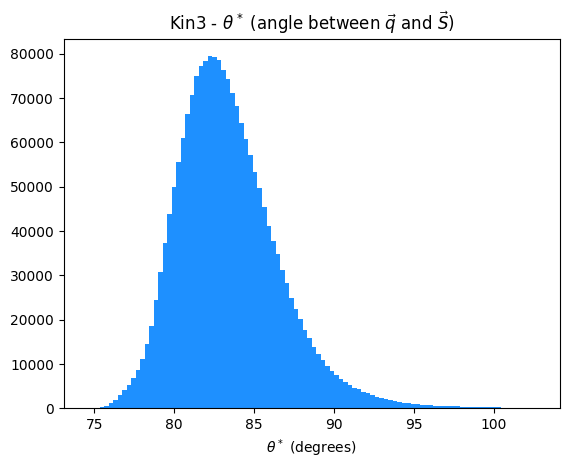

In [191]:
d=plt.hist(thStar_deg,bins=100,color='dodgerblue')
plt.title(r'Kin3 - $\theta^*$ (angle between $\vec{q}$ and $\vec{S}$)')
plt.xlabel(r'$\theta^*$ (degrees)')

Text(0.5, 0, '$\\phi^*$ (degrees)')

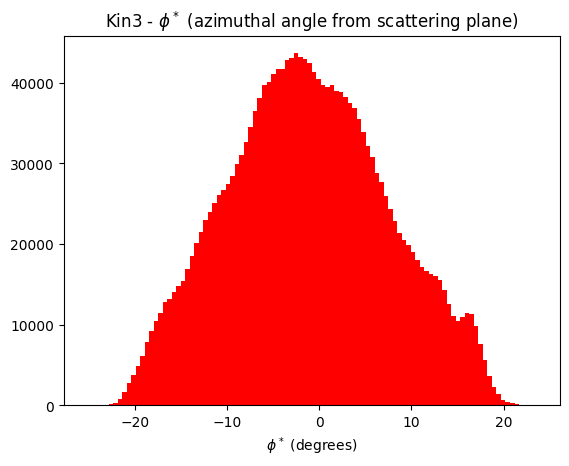

In [192]:
d=plt.hist(phStar_deg,bins=100,color='red')
plt.title(r'Kin3 - $\phi^*$ (azimuthal angle from scattering plane)')
plt.xlabel(r'$\phi^*$ (degrees)')

Define momentum transfer vector

$\vec{q} = \vec{p}_{e'} - \vec{p}_e$

Define scattering plane normal

$\vec{n} = \hat{p}_e \times \hat{p}_{e'}$

Normalize vectors

$\hat{q} = \frac{\vec{q}}{|\vec{q}|}, \quad \hat{n} = \frac{\vec{n}}{|\vec{n}|}$

Define polarization direction from field measurements (spherical)

$\vec{S} = 
\begin{pmatrix}
\sin\theta^* \cos\phi^* \\
\sin\theta^* \sin\phi^* \\
\cos\theta^*
\end{pmatrix}
$
Theta star: angle between polarization and q vector

$\theta^* = \cos^{-1}(\hat{q} \cdot \vec{S})$

Define scattering-plane-based coordinate system

$\hat{z} = \hat{q}, \quad
\hat{y} = \frac{\vec{p}_e \times \vec{p}_{e'}}{|\vec{p}_e \times \vec{p}_{e'}|}, \quad
\hat{x} = \hat{y} \times \hat{z}$

Project S into plane perpendicular to q

$S_x = \vec{S} \cdot \hat{x}, \quad
S_y = \vec{S} \cdot \hat{y}, \quad
S_z = \vec{S} \cdot \hat{z}$

Phi star: angle between projected S and the scattering plane

$\phi^* = \tan^{-1}\left( \frac{S_y}{S_x} \right)
$

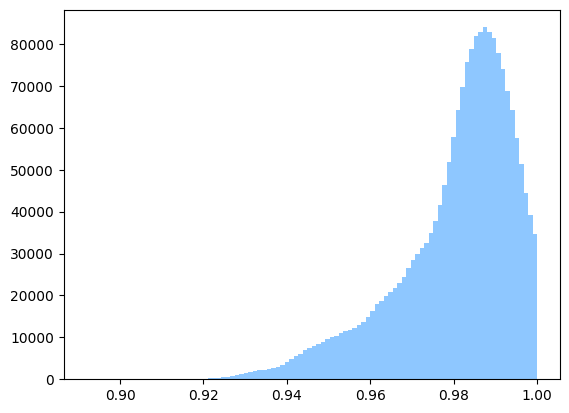

In [166]:
d=plt.hist(Px,bins=100,color='dodgerblue',alpha=.5)
#d=plt.hist(Pz,bins=100,color='red',alpha=.5)


(array([1.60540e+04, 2.81193e+05, 7.85219e+05, 6.47361e+05, 2.25429e+05,
        3.74260e+04, 5.87400e+03, 1.23300e+03, 1.90000e+02, 2.10000e+01]),
 array([ 1.48601433,  2.49843962,  3.51086492,  4.52329022,  5.53571552,
         6.54814082,  7.56056611,  8.57299141,  9.58541671, 10.59784201,
        11.61026731]),
 <BarContainer object of 10 artists>)

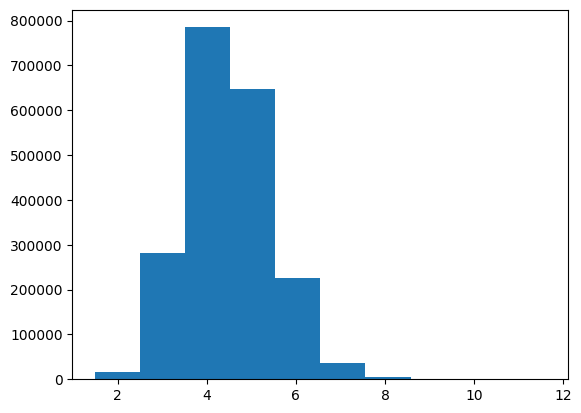

In [50]:
plt.hist(Q2recon)

In [193]:
# for inelastic xsec calc Theta and Beta

In [194]:
Theta = []  # angle between S and peprime
Beta = []   # angle between S and pe

S_hat = kin3_xyz.Unit()

for i in range(len(trPx)):
    Pe = TLorentzVector(0, 0, E_beam, E_beam)
    Peprime = TLorentzVector(trPx[i], trPy[i], trPz[i], trP[i])

    pe_hat = Pe.Vect().Unit()
    pep_hat = Peprime.Vect().Unit()

    # Capital Theta: angle between S and outgoing electron
    theta = np.arccos(np.clip(pep_hat.Dot(S_hat), -1.0, 1.0))
    Theta.append(theta)

    # Capital Beta: angle between S and incoming electron
    beta = np.arccos(np.clip(pe_hat.Dot(S_hat), -1.0, 1.0))
    Beta.append(beta)


In [197]:
Theta_deg = np.degrees(Theta)
Beta_deg = np.degrees(Beta)

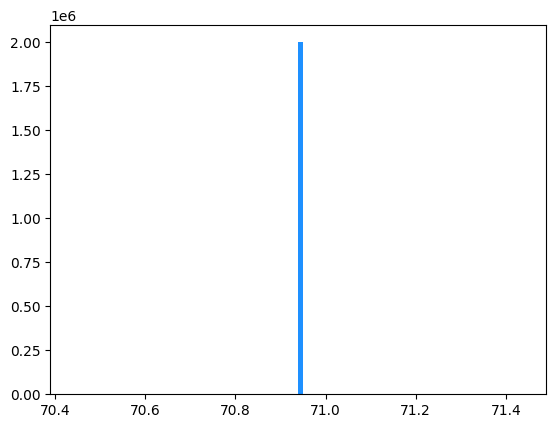

In [198]:
d=plt.hist(Beta_deg,bins=100,color='dodgerblue')



Text(0.5, 0, '$\\Theta^*$ (degrees)')

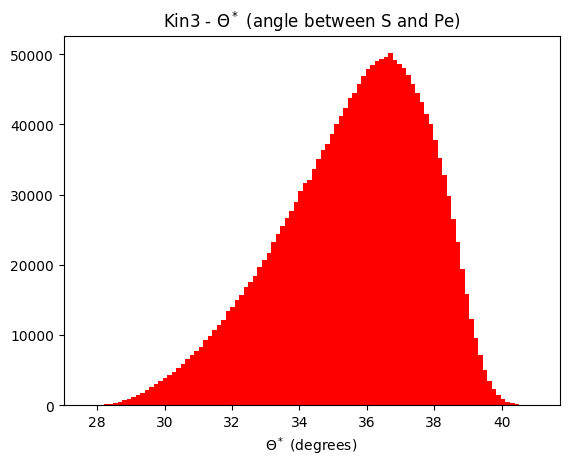

In [205]:
d=plt.hist(Theta_deg,bins=100,color='red')
plt.title(r'Kin3 - $\Theta^*$ (angle between S and Pe)')
plt.xlabel(r'$\Theta^*$ (degrees)')